# **Visualizing Measurement Results**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#path:
RESULT_PATH = "../results/arteria/low/"

In [23]:
iongs = pd.read_csv(RESULT_PATH+"iong.csv")
distances = pd.read_csv(RESULT_PATH+"distances.csv")

Text(0, 0.5, 'IONG [edges]')

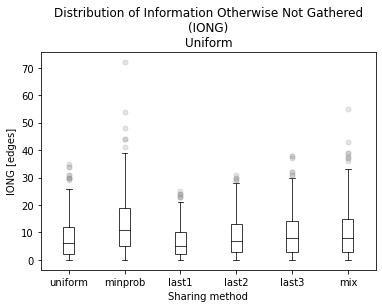

In [26]:
iongs_ = iongs[iongs["uniform"] > -1]
iongs_ = iongs_.drop(columns=["id"])
ax = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0,
    flierprops={"color":"k", "marker":"o", "markersize":5.0, "alpha":0.25})

plt.setp(ax.artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
plt.setp(ax.lines, color='k', linewidth=0.75)

plt.title("Distribution of Information Otherwise Not Gathered\n(IONG)\nUniform")
plt.xlabel("Sharing method")
plt.ylabel("IONG [edges]")

In [5]:
iongs_.describe()

,uniform,minprob,last1,last2,last3,mix
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,7.977528,13.591760,6.846442,8.940075,9.940075,10.355805
std,7.439951,11.151807,5.855626,7.354872,8.422812,9.504886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000
50%,6.000000,11.000000,5.000000,7.000000,8.000000,8.000000
75%,12.000000,19.000000,10.000000,13.000000,14.000000,15.000000
max,35.000000,72.000000,25.000000,31.000000,38.000000,55.000000


Text(0, 0.5, 'Incorrectness [edges]')

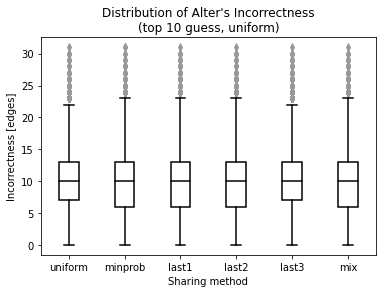

In [6]:
ax = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

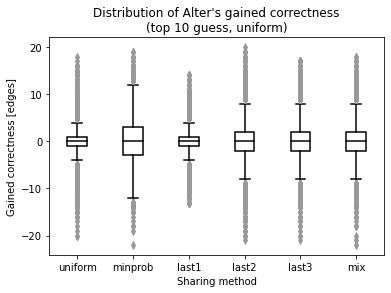

In [7]:
ax = sns.boxplot(x="method", y="Distance difference", data=distances, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [8]:
best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]

Text(0, 0.5, 'Incorrectness [edges]')

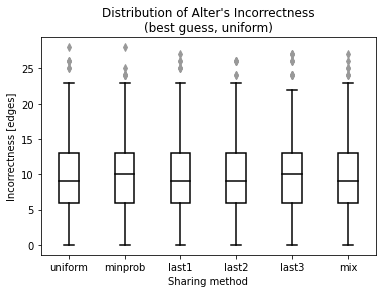

In [9]:
ax = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

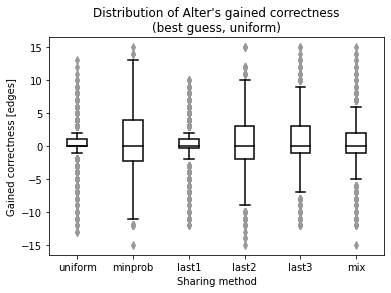

In [10]:
ax = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [40]:
best_guesses.describe()

,id,Alter correctness\ndistance [m]
count,5640.000000,5640.000000
mean,247.269149,9.144149
std,142.446491,5.548698
min,1.000000,0.000000
25%,130.000000,5.000000
50%,240.000000,9.000000
75%,358.000000,12.000000
max,499.000000,30.000000


---
## **Summarizing multiple results**

In [28]:
uniforms = [["low_uniform/", "low traffic"],
            ["medium_uniform/", "medium traffic"],
            ["high_uniform/","high traffic"]]
stationaries = [["low/", "low traffic, stationary origin"],
                ["medium/", "medium traffic, stationary origin"],
                ["high/","high traffic, stationary origin"]]

In [29]:
#path:
RESULT_PATH = "../results/no_arteria/"

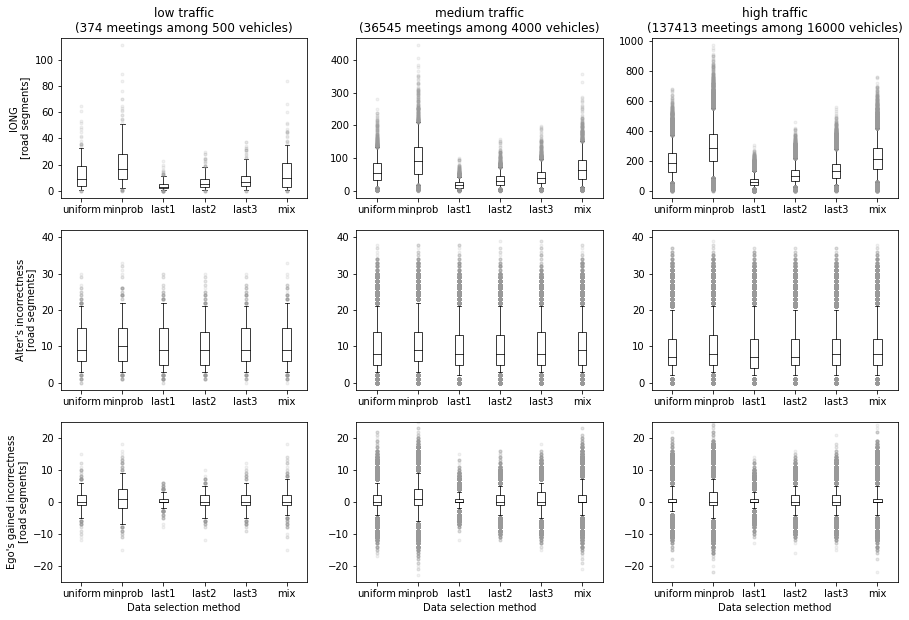

In [34]:
WIDTH = 0.2
WHIS = [5, 95]

fig, ax = plt.subplots(3, 3, figsize=[15, 10])

for i, (path_suffix, label) in enumerate(uniforms):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])+1
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0, ax=ax[0,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[0,i].lines, color='k', linewidth=0.75)

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG\n[road segments]")

    ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,i])
        
    '''########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=0.35, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")'''
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[1,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[1,i].lines, color='k', linewidth=0.75)

    if i==0:
        ax[1,i].set_ylabel("Alter's incorrectness\n[road segments]")
    else:
        ax[1,i].set_ylabel("")
    ax[1,i].set_xlabel("")
    ax[1,i].set_ylim(-2, 42)
    
    ########################
    #Gained correctness:
    ax[2,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[2,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[2,i].lines, color='k', linewidth=0.75)

    ax[2,i].set_xlabel("Data selection method")
    if i==0:
        ax[2,i].set_ylabel("Ego's gained incorrectness\n[road segments]")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_ylim(-25, 25)

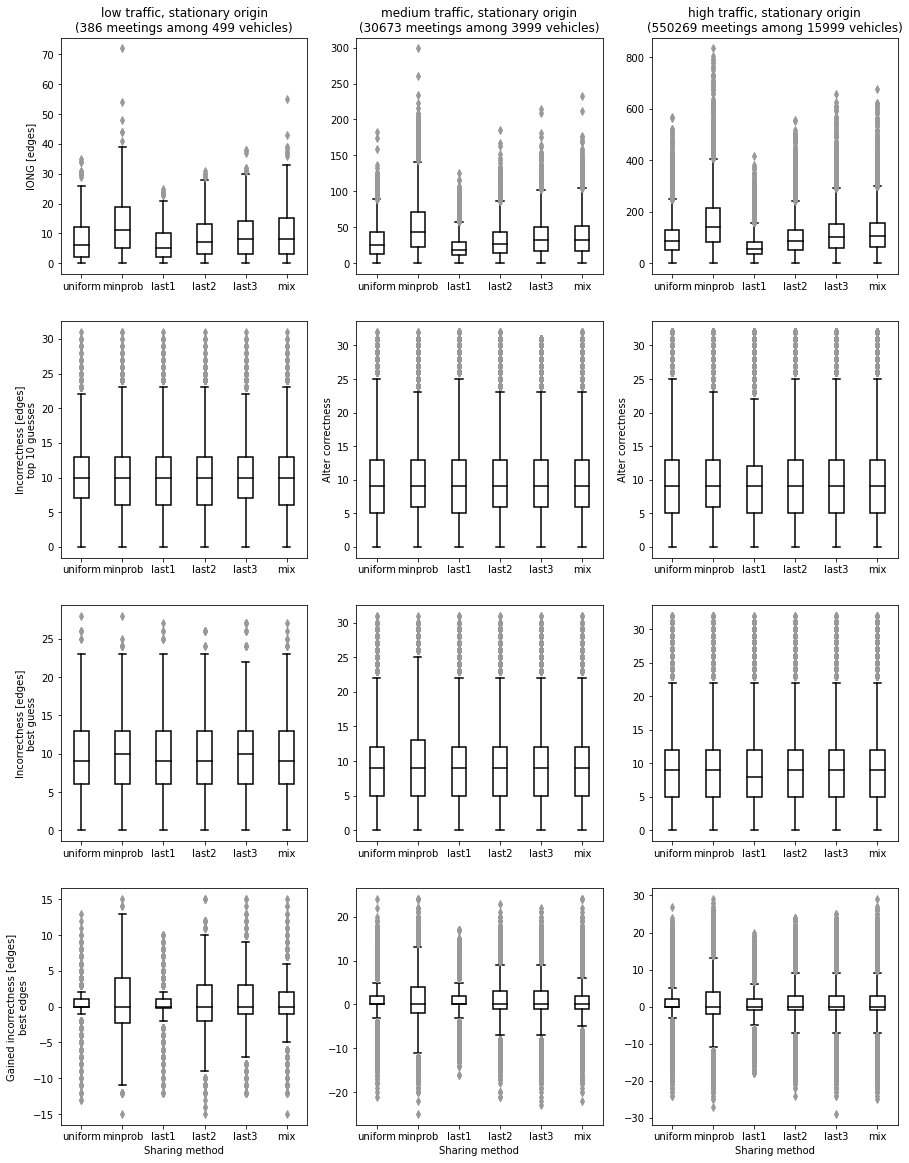

In [5]:
fig, ax = plt.subplots(4, 3, figsize=[15, 20])

for i, (path_suffix, label) in enumerate(stationaries):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0, ax=ax[0,i])

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[0,i].lines, color='k')

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG [edges]")
        
    ########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=WIDTH, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[2,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[2,i])
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[2,i].lines, color='k')

    if i==0:
        ax[2,i].set_ylabel("Incorrectness [edges]\nbest guess")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_xlabel("")
    
    ########################
    #Gained correctness:
    ax[3,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[3,i])
    plt.setp(ax[3,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[3,i].lines, color='k')

    ax[3,i].set_xlabel("Sharing method")
    if i==0:
        ax[3,i].set_ylabel("Gained incorrectness [edges]\nbest edges")
    else:
        ax[3,i].set_ylabel("")